In [23]:
import numpy as np
from gemmi import cif
import matplotlib.pyplot as plt

def plot_isotherm(filename, color):
    
    aif = cif.read_file(filename)
    block = aif.sole_block()
    ads_press = np.array(block.find_loop('_adsorp_pressure'),dtype=float)
    ads_amount = np.array(block.find_loop('_adsorp_amount'),dtype=float)
    des_press = np.array(block.find_loop('_desorp_pressure'),dtype=float)
    des_amount = np.array(block.find_loop('_desorp_amount'),dtype=float)

    material_id = block.find_pair('_sample_material_id')[-1]
    adsorptive = block.find_pair('_exptl_adsorptive')[-1]
    temperature = block.find_pair('_exptl_temperature')[-1]

    plt.semilogx(ads_press,ads_amount, 'o-', color=color, label=adsorptive+" "+str(temperature)+' '+material_id)
    plt.plot(des_press,des_amount, 'o--', color=color, markerfacecolor="None")
    #plt.title(adsorptive+" "+str(temperature)+' '+material_id)
    plt.xlabel("pressure / Pa")
    plt.ylabel("amount adsorbed / mmol$\,$g$^{-1}$")
    return


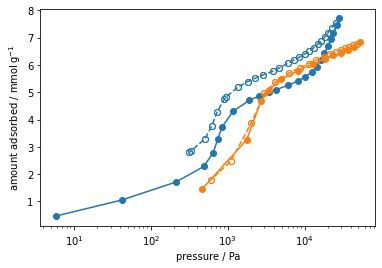

In [28]:
plot_isotherm("database/DUT-67/DUT67_1_Garching_acetone_298K.DAT.aif", "C0")
plot_isotherm("database/DUT-67/DUT67_1_Garching_DCM_298K.DAT.aif", "C1")
plt.show()
